# Simple linear regression model using Tensorflow with low level API.

# 0 - IMPORTS

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 

%matplotlib inline
warnings.filterwarnings('ignore')

# 1 - DATA LOAD

In [19]:
df1 = pd.read_csv('data\house_prices.csv')
df_shape = df1.shape 
print('Rows: {}\nCols: {}'.format(df_shape[0], df_shape[1]))
df1.head()

Rows: 21613
Cols: 21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 2 - CREATE X, y VARIABLES

In [ ]:
X = df1.iloc[:, 5].values # create numpy array variable
X = X.reshape(-1, 1) # transform to matrix 

In [ ]:
y = df1.iloc[:, 2:3].values # create matrix variable, same as reshape(-1, 1)

# 3 - DATA TRANSFORMATION

In [ ]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# 4 - DATA VISUALIZATION

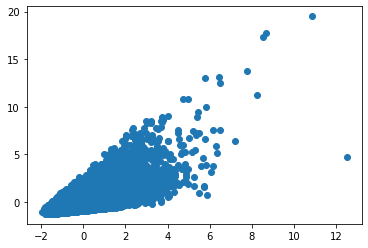

In [20]:
plt.scatter(X, y);

# 5 - LINEAR REGRESSION MODEL

### Simple Linear Regression Formula

### y = b0 + b1 * x

## 5.1 - Columns Creation

In [ ]:
columns = [tf.feature_column.numeric_column('X', shape = [1])]
columns

## 5.2 - Create Regressor

In [ ]:
regressor_model = tf.estimator.LinearRegressor(feature_columns=columns)

## 5.2 - Create Train & Test Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 5.3 - Create Train and Test Function 

In [ ]:
function_train = tf.estimator.inputs.numpy_input_fn( {'X': X_train}, y_train, batch_size=32, num_epochs=None, shuffle=True )

In [ ]:
function_test = tf.estimator.inputs.numpy_input_fn( {'X': X_test}, y_test, batch_size=32, num_epochs=1000, shuffle=False )

## 5.4 - Train Regressor

In [ ]:
regressor_model.train( input_fn=function_train, steps=10000 )

## 5.5 - Train Evaluation

In [ ]:
train_metrics = regressor_model.evaluate( input_fn = function_train, steps=10000 )

## 5.6 - Test Evaluation

In [ ]:
test_metrics = regressor_model.evaluate( input_fn = function_test, steps=10000 )

In [ ]:
train_metrics, test_metrics

## 5.7 - Model Prediction

In [ ]:
new_houses = np.array( [[800], [900], [1000]] )
new_houses = scaler_x.transform(new_houses)

In [ ]:
# Create prediction function
function_predict = tf.estimator.inputs.numpy_input_fn( {'X': y_test}, shuffle=False )

In [ ]:
predict = regressor_model.predict( input_fn = function_predict )

for p in predict:
    print(scaler_y.inverse_transform(p['predictions']))